# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [8]:
# train 데이터 불러오기
train = pd.read_csv('./graduate_train.csv')

# train 데이터 크기 확인
print(train.shape)
# train 데이터 훑어보기
train.info()
train.describe()

(400, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,316.31000,107.097500,3.08250,3.348750,3.465000,8.560650,0.717675
std,11.29548,6.022763,1.15283,0.977952,0.909446,0.601597,0.140687
min,290.00000,92.000000,1.00000,1.000000,1.500000,6.800000,0.340000
25%,308.00000,103.000000,2.00000,2.500000,3.000000,8.120000,0.630000
50%,317.00000,107.000000,3.00000,3.500000,3.500000,8.545000,0.720000
75%,324.00000,112.000000,4.00000,4.000000,4.000000,9.025000,0.820000
max,340.00000,120.000000,5.00000,5.000000,5.000000,9.920000,0.970000


In [9]:
# test 데이터 불러오기
test = pd.read_csv('./graduate_test.csv')

# test 데이터 크기 확인
print(test.shape)
# test 데이터 훑어보기
test.info()
test.describe()
# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

(100, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          100 non-null    int64  
 1   TOEFL Score        100 non-null    int64  
 2   University Rating  100 non-null    int64  
 3   SOP                100 non-null    float64
 4   LOR                100 non-null    float64
 5   CGPA               100 non-null    float64
 6   Research           100 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 5.6+ KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,317.120000,107.570000,3.240000,3.47500,3.560000,8.639600
std,11.327342,6.329752,1.102064,1.04053,0.988009,0.616518
min,296.000000,94.000000,1.000000,1.00000,1.000000,7.300000
25%,309.000000,103.000000,2.000000,2.50000,3.000000,8.130000
50%,317.000000,107.000000,3.000000,3.50000,3.750000,8.655000
75%,326.250000,112.000000,4.000000,4.50000,4.500000,9.132500
max,340.000000,120.000000,5.000000,5.00000,5.000000,9.860000


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [10]:
## TODO
print(train.isnull().sum())
print()
print(test.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 데이터에 결측치가 없습니다

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [11]:
## TODO
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
Research_OHE = OHE.fit_transform(train['Research'].to_numpy().reshape(-1,1)).toarray()
train[['Research_No', 'Research_Yes']] = Research_OHE
train = train.drop('Research', axis=1)
train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1.0,0.0
1,307,105,2,2.5,4.5,8.12,0.67,0.0,1.0
2,329,111,4,4.5,4.0,9.01,0.81,0.0,1.0
3,300,105,1,1.0,2.0,7.80,0.58,1.0,0.0
4,329,114,5,4.0,5.0,9.30,0.86,0.0,1.0
...,...,...,...,...,...,...,...,...,...
395,316,110,3,3.5,4.0,8.56,0.75,1.0,0.0
396,302,110,3,4.0,4.5,8.50,0.65,1.0,0.0
397,312,107,4,4.5,4.0,8.65,0.73,0.0,1.0
398,298,99,1,1.5,3.0,7.46,0.53,1.0,0.0


In [12]:
OHE = OneHotEncoder()
Research_OHE = OHE.fit_transform(test['Research'].to_numpy().reshape(-1,1)).toarray()
test[['Research_No', 'Research_Yes']] = Research_OHE
test = test.drop('Research', axis=1)
test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1.0,0.0
1,297,96,2,2.5,1.5,7.89,1.0,0.0
2,302,101,2,2.5,3.5,7.96,1.0,0.0
3,318,112,3,4.0,3.5,8.67,1.0,0.0
4,304,100,4,1.5,2.5,7.84,1.0,0.0
...,...,...,...,...,...,...,...,...
95,312,107,3,3.0,2.0,7.90,0.0,1.0
96,313,94,2,2.5,1.5,8.13,1.0,0.0
97,313,109,3,4.0,3.5,9.00,1.0,0.0
98,316,104,3,3.0,3.5,8.00,0.0,1.0


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. University Rating은 순서형 변수, Research는 명목형 변수인 것으로 보인다. 전자의 경우 이미 Numerical하게 표현되어 있으므로 따로 처리하지 않고 Research 같은 경우 One hot encoding을 해준다.

# 3. 선형(Linear) 회귀

In [13]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = train.drop('Chance of Admit', axis=1)
y = train['Chance of Admit']

In [14]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [15]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [16]:
from sklearn.linear_model import LinearRegression

In [19]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
LR = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
LR.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_pred = LR.predict(X_test)

#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [24]:
## TODO
LR.intercept_

-1.2419421437018654

Q. 절편 계수의 의미는 무엇인가요?  
A. 독립변수가 모두 0일 때 y값

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [26]:
train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Chance of Admit', 'Research_No', 'Research_Yes'],
      dtype='object')

In [25]:
## TODO
LR.coef_

array([ 0.00164004,  0.00360629,  0.00274832,  0.00725297,  0.01734313,
        0.11207947, -0.01324072,  0.01324072])

Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 독립변수가 한단위 증가할 때 종속변수가 증가하는 정도  
여기서는 CGPA가 가장 높은 계수값을 가진다. CGPA가 한단위 증가하면 합격확률이 0.112 만큼 증가한다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

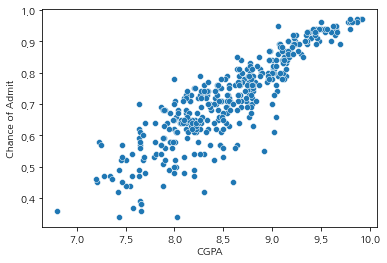

In [29]:
## TODO
import seaborn as sns
sns.scatterplot(data=train, x='CGPA', y='Chance of Admit')

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

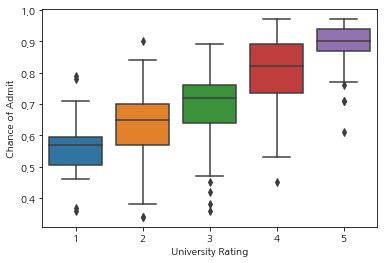

In [30]:
## TODO
sns.boxplot(data=train, x='University Rating', y='Chance of Admit')

### 3.2. StatsModels로 선형 회귀 시행하기

In [31]:
import statsmodels.api as sm

In [32]:
## TODO
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     251.2
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          1.27e-140
Time:                        21:37:33   Log-Likelihood:                 557.86
No. Observations:                 400   AIC:                            -1100.
Df Residuals:                     392   BIC:                            -1068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0015      0.00

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. F-statistic를 고려할 때 해당 모형은 유의한 선형모형이라고 할 수 있고, R square 값을 고려할 때 각 변수가 전체 분산을 0.8 정도 설명하므로 나름 괜찮은 모형이라고 생각할 수 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. p-value가 0.05보다 크므로 해당 변수는 통계적으로 유의하지 못하다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [39]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
RC = RidgeCV()
# 2. 모델을 적합시킵니다.
## TODO
RC.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_pred = RC.predict(X_test)

In [40]:
print('Variance score: %.4f' % r2_score(y_test, y_pred))

Variance score: 0.7711


In [41]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
LC = LassoCV()
# 2. 모델을 적합시킵니다.
## TODO
LC.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_pred = LC.predict(X_test)

In [42]:
print('Variance score: %.4f' % r2_score(y_test, y_pred))

Variance score: 0.7691


In [49]:
submission = pd.DataFrame(LR.predict(test)).rename(columns={0:'Chance of Admit'})
submission.to_csv('graduate_submission.csv')